In [1]:
!pip install seaborn

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf

In [2]:
import pickle  # Use pickle for model serialization

In [3]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [4]:
# Load the data
salone_flood_prediction_train_data = pd.read_csv("kerala.csv")

In [5]:
# Data exploration
print("Dataset Overview:")
print(salone_flood_prediction_train_data.head())

Dataset Overview:
  SUBDIVISION  YEAR   JAN   FEB   MAR    APR    MAY     JUN     JUL    AUG  \
0      KERALA  1901  28.7  44.7  51.6  160.0  174.7   824.6   743.0  357.5   
1      KERALA  1902   6.7   2.6  57.3   83.9  134.5   390.9  1205.0  315.8   
2      KERALA  1903   3.2  18.6   3.1   83.6  249.7   558.6  1022.5  420.2   
3      KERALA  1904  23.7   3.0  32.2   71.5  235.7  1098.2   725.5  351.8   
4      KERALA  1905   1.2  22.3   9.4  105.9  263.3   850.2   520.5  293.6   

     SEP    OCT    NOV    DEC   ANNUAL_RAINFALL FLOODS  
0  197.7  266.9  350.8   48.4            3248.6    YES  
1  491.6  358.4  158.3  121.5            3326.6    YES  
2  341.8  354.1  157.0   59.0            3271.2    YES  
3  222.7  328.1   33.9    3.3            3129.7    YES  
4  217.2  383.5   74.4    0.2            2741.6     NO  


In [6]:
# Check for missing values
print("\nMissing Values:")
print(salone_flood_prediction_train_data.isnull().sum())


Missing Values:
SUBDIVISION         0
YEAR                0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
 ANNUAL_RAINFALL    0
FLOODS              0
dtype: int64


In [7]:
# Convert 'YES' to 1 and 'NO' to 0 in the 'FLOODS' column
salone_flood_prediction_train_data['FLOODS'] = salone_flood_prediction_train_data['FLOODS'].map({'YES': 1, 'NO': 0})

In [8]:
print(salone_flood_prediction_train_data['FLOODS'].value_counts())

FLOODS
1    60
0    58
Name: count, dtype: int64


In [9]:
# Descriptive statistics
print("\nDescriptive Statistics:")
print(salone_flood_prediction_train_data.describe())


Descriptive Statistics:
              YEAR         JAN         FEB         MAR         APR  \
count   118.000000  118.000000  118.000000  118.000000  118.000000   
mean   1959.500000   12.218644   15.633898   36.670339  110.330508   
std      34.207699   15.473766   16.406290   30.063862   44.633452   
min    1901.000000    0.000000    0.000000    0.100000   13.100000   
25%    1930.250000    2.175000    4.700000   18.100000   74.350000   
50%    1959.500000    5.800000    8.350000   28.400000  110.400000   
75%    1988.750000   18.175000   21.400000   49.825000  136.450000   
max    2018.000000   83.500000   79.000000  217.200000  238.000000   

              MAY          JUN          JUL          AUG         SEP  \
count  118.000000   118.000000   118.000000   118.000000  118.000000   
mean   228.644915   651.617797   698.220339   430.369492  246.207627   
std    147.548778   186.181363   228.988966   181.980463  121.901131   
min     53.400000   196.800000   167.500000   178.600000

In [10]:
salone_flood_prediction_train_data.columns = salone_flood_prediction_train_data.columns.str.strip()

C:\Users\Steven\Documents\Boot_Camp_2023\ML_Learning_Project\Frontiers_Tech_Leaders_Programme\env\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


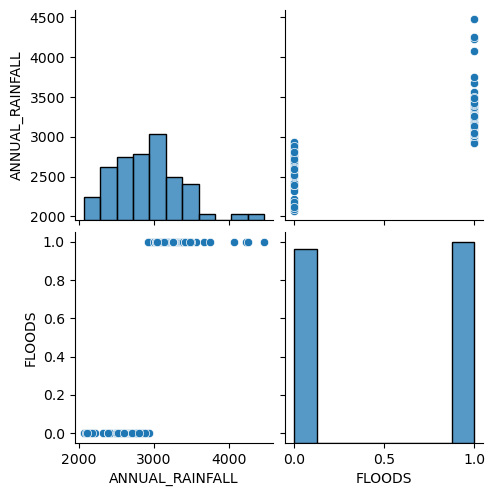

In [11]:
# Data visualization
# Convert 'FLOODS' column to numeric, coercing errors to NaN
#salone_flood_prediction_train_data['FLOODS'] = pd.to_numeric(salone_flood_prediction_train_data['FLOODS'], errors='coerce')

# Drop rows with NaN values in the selected columns
#data_for_pairplot = salone_flood_prediction_train_data[['ANNUAL_RAINFALL', 'FLOODS']].fillna(salone_flood_prediction_train_data.mean())

# Pairplot for selected features
sns.pairplot(salone_flood_prediction_train_data[['ANNUAL_RAINFALL', 'FLOODS']])
plt.show()

In [12]:
salone_flood_prediction_train_data

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL_RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,1
114,KERALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,0
115,KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,0
116,KERALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,0


In [13]:
print(salone_flood_prediction_train_data.columns)

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL_RAINFALL', 'FLOODS'],
      dtype='object')


In [14]:
print(salone_flood_prediction_train_data.dtypes)

SUBDIVISION         object
YEAR                 int64
JAN                float64
FEB                float64
MAR                float64
APR                float64
MAY                float64
JUN                float64
JUL                float64
AUG                float64
SEP                float64
OCT                float64
NOV                float64
DEC                float64
ANNUAL_RAINFALL    float64
FLOODS               int64
dtype: object


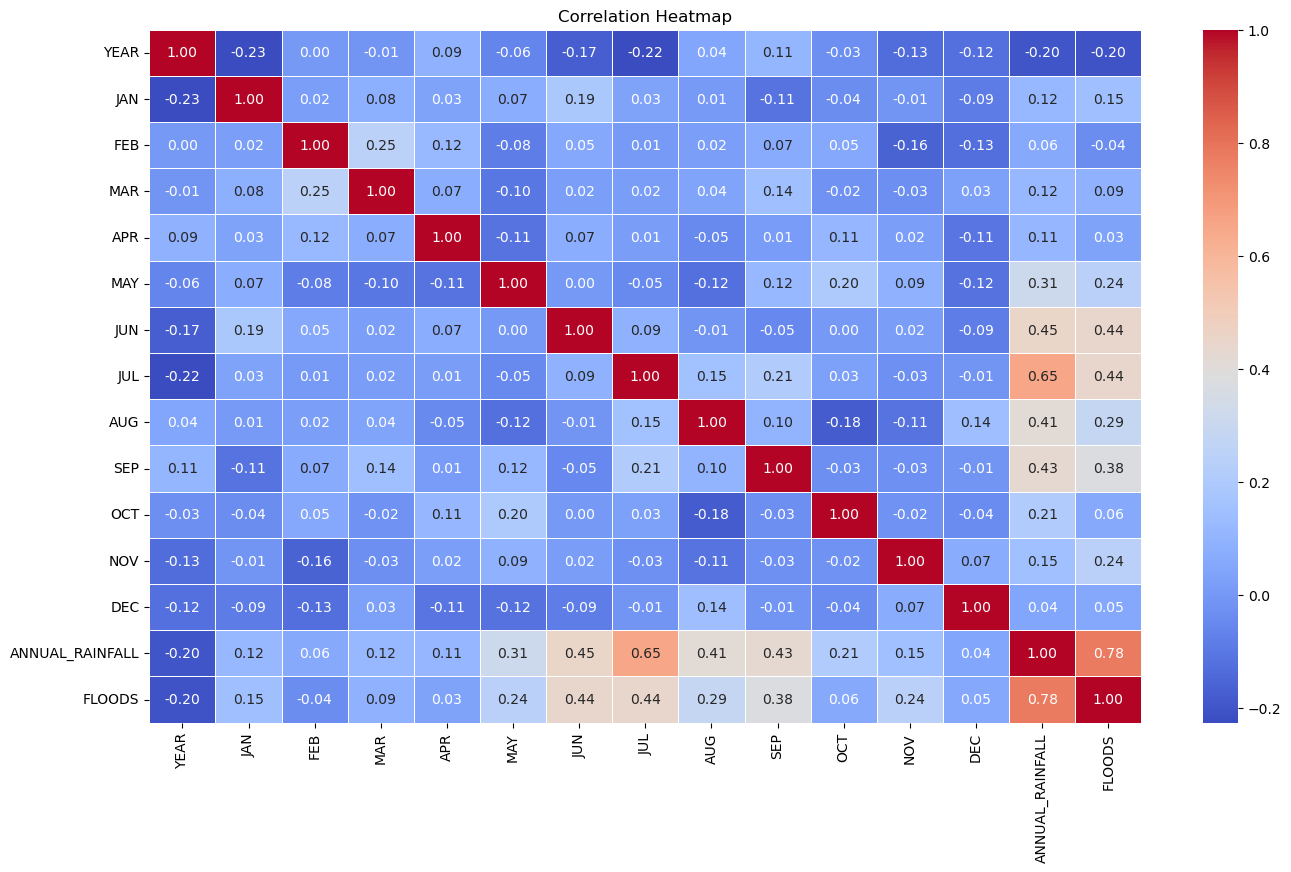

In [16]:
# Select only numeric columns
numeric_columns = salone_flood_prediction_train_data.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
corr_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(16,9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [17]:
# Data preprocessing
X = salone_flood_prediction_train_data[['JAN', 'FEB','MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP','OCT','NOV', 'DEC', 'ANNUAL_RAINFALL']]
y = salone_flood_prediction_train_data['FLOODS']

In [18]:
# Print the number of non-NaN values in X and y
print("Number of non-NaN values in X:", X.count())
print("Number of non-NaN values in y:", y.count())

Number of non-NaN values in X: JAN                118
FEB                118
MAR                118
APR                118
MAY                118
JUN                118
JUL                118
AUG                118
SEP                118
OCT                118
NOV                118
DEC                118
ANNUAL_RAINFALL    118
dtype: int64
Number of non-NaN values in y: 118


In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

In [21]:

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training and evaluation
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier()
}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    predictions = model.predict(X_test_scaled)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    
    # Print the results
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy*100}")
    print("Classification Report:")
    print(report)
    print("\n" + "="*50 + "\n")


Model: Logistic Regression
Accuracy: 100.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        11

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



Model: K-Nearest Neighbors
Accuracy: 75.0
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        13
           1       0.73      0.73      0.73        11

    accuracy                           0.75        24
   macro avg       0.75      0.75      0.75        24
weighted avg       0.75      0.75      0.75        24



Model: Support Vector Machine
Accuracy: 91.66666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.

In [22]:
# Cross-validation

from sklearn.model_selection import cross_val_score

# Logistic Regression model
logistic_regression_model = LogisticRegression()

# Perform k-fold cross-validation (let's use k=5)
scores = cross_val_score(model, X_train_scaled, y_train, cv=5)

# Print cross-validation scores
print("Cross-validation scores:", scores)
print("Cross-Validated accuracy:", scores.mean())

Cross-validation scores: [1.         1.         1.         0.94736842 0.94444444]
Cross-Validated accuracy: 0.9783625730994151


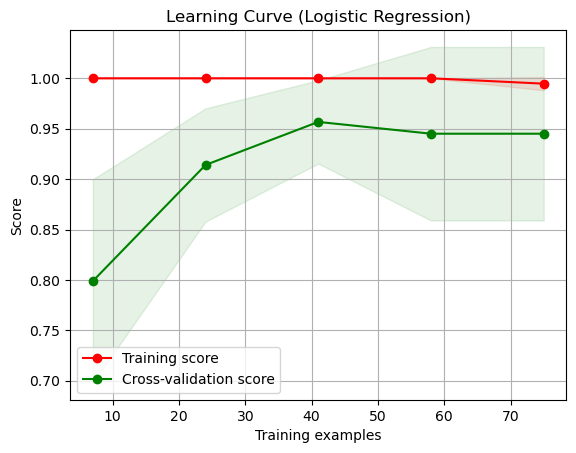

In [52]:
# Learning Curves:
from sklearn.model_selection import learning_curve

# Function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve for Logistic Regression
plot_learning_curve(logistic_regression_model, "Learning Curve (Logistic Regression)", X_train_scaled, y_train, cv=5)
plt.show()


In [22]:
# Feature Engineering and Regularization
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the model with the best hyperparameters
best_logistic_regression_model = grid_search.best_estimator_
best_logistic_regression_model.fit(X_train_scaled, y_train)
best_accuracy = best_logistic_regression_model.score(X_test_scaled, y_test)

print("Accuracy with best hyperparameters:", best_accuracy)


Best hyperparameters: {'C': 1}
Accuracy with best hyperparameters: 1.0


In [23]:
salone_flood_prediction_train_data.head(2)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL_RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1


In [24]:
single_obs = [[28.7,44.7, 51.6, 160.0, 174.7, 824.6, 743.0, 357.5, 197.7, 266.9, 350.8, 48.4, 3248.6]]
# predictions(single_obs)
predictions = model.predict(single_obs)

In [25]:
print(predictions)
print(f"Model: {model_name}")
print(f"Accuracy: {accuracy}")

[1]
Model: Decision Tree
Accuracy: 0.9166666666666666


In [26]:
single_obs = [[128.7,44.7, 51.6, 160.0, 674.7, 824.6, 743.0, 357.5, 297.7, 166.9, 650.8, 48.4, 3248.6]]
# predictions(single_obs)
predictions = model.predict(single_obs)
print(predictions)
print(f"Model: {KNeighborsClassifier()}")
print(f"Accuracy: {accuracy}")

[1]
Model: KNeighborsClassifier()
Accuracy: 0.9166666666666666


In [27]:
# Save the trained model to a file using pickle
with open('Salone_Flood_prediction_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)